In [2]:
#Importing libraries and loading dataset
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

def parse(x):
    return datetime.strptime(x, '%Y %m %d %H')
                          
org_col_names=["No", "year","month", "day", "hour", "pm2.5", "DEWP","TEMP", "PRES", "cbwd", "Iws", "Is", "Ir"]
col_names = ['pollution', 'dew', 'temp', 'pressure', 'w_dir', 'w_speed', 'snow', 'rain']   
                            
dataset = pd.read_csv('AirPollution.csv',index_col=0, date_parser=parse,parse_dates=[['year', 'month', 'day', 'hour']])                            

In [3]:
dataset.head()

,No,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
year_month_day_hour,,,,,,,,,
2010-01-01 00:00:00,1,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01 01:00:00,2,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01 02:00:00,3,NaN,-21,-11.0,1019.0,NW,6.71,0,0
2010-01-01 03:00:00,4,NaN,-21,-14.0,1019.0,NW,9.84,0,0
2010-01-01 04:00:00,5,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [4]:
# Data cleaning
dataset.drop('No', axis=1, inplace=True)
dataset.columns = col_names
dataset['pollution'].fillna(0, inplace=True)
dataset = dataset[24:] # drop the first day
print(dataset.head(5))
dataset.to_csv('pollution.csv') # save new CSV

                     pollution  dew  temp  pressure w_dir  w_speed  snow  rain
year_month_day_hour                                                           
2010-01-02 00:00:00      129.0  -16  -4.0    1020.0    SE     1.79     0     0
2010-01-02 01:00:00      148.0  -15  -4.0    1020.0    SE     2.68     0     0
2010-01-02 02:00:00      159.0  -11  -5.0    1021.0    SE     3.57     0     0
2010-01-02 03:00:00      181.0   -7  -5.0    1022.0    SE     5.36     1     0
2010-01-02 04:00:00      138.0   -7  -5.0    1022.0    SE     6.25     2     0


In [5]:
# load dataset
df = pd.read_csv('pollution.csv', header=0, index_col=0)
df.describe()

,pollution,dew,temp,pressure,w_speed,snow,rain
count,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000
mean,94.013516,1.828516,12.459041,1016.447306,23.894307,0.052763,0.195023
std,92.252276,14.429326,12.193384,10.271411,50.022729,0.760582,1.416247
min,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,24.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,68.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,132.250000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,994.000000,28.000000,42.000000,1046.000000,585.600000,27.000000,36.000000


In [6]:
dataset_columns = df.columns.tolist()
dataset_columns

['pollution', 'dew', 'temp', 'pressure', 'w_dir', 'w_speed', 'snow', 'rain']

<AxesSubplot: >

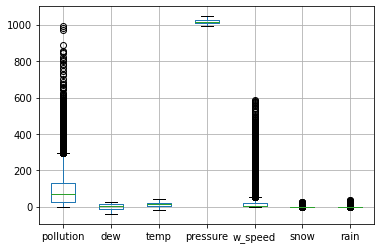

In [7]:
#Box plot
#pd.options.display.mpl_style = False
df.boxplot()

In [8]:
df

,pollution,dew,temp,pressure,w_dir,w_speed,snow,rain
year_month_day_hour,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0
...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,NW,231.97,0,0
2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,NW,237.78,0,0
2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,NW,242.70,0,0


C:\Users\ashis\AppData\Local\Temp\ipykernel_16400\1524493847.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(df.corr())


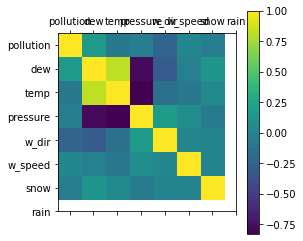

In [9]:
#Analysing relationship between different features
# cor_cols = ['pollution', 'wnd_spd', 'rain', 'snow', 'temp']
cor_cols = dataset_columns
plt.matshow(df.corr())
plt.xticks(range(len(cor_cols)), cor_cols)
plt.yticks(range(len(cor_cols)), cor_cols)
plt.colorbar()
plt.show()

In [10]:
from sklearn.preprocessing import LabelEncoder

# Encode non categorical values
values = df.values
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
values = values.astype('float32')
values[:,4]

array([2., 2., 2., ..., 1., 1., 1.], dtype=float32)

In [11]:
#Normalising data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_dataset = scaler.fit_transform(values)

In [12]:
#Creating a window for previous data
def to_supervised(train):
  window_size = 4
  X = []
  Y = []
  for i in range(window_size, len(train)):
    X.append(train[i-window_size:i,:])
    Y.append(train[i,0:1])
    
  return X,Y

In [13]:
X, Y = to_supervised(scaled_dataset)
X = np.array(X)
Y = np.array(Y)
print('Y' ,Y.shape)
print('X' ,X.shape)


Y (43796, 1)
X (43796, 4, 8)


In [14]:
#Splitting the dataset
n_train = 24*365
X_train, X_test = X[n_train:,] , X[:n_train,]
print('X_train' ,X_train.shape)
print('X_test' ,X_test.shape)

Y_train, Y_test = Y[n_train:,] , Y[:n_train,]
print('Y_train' ,Y_train.shape)
print('Y_test' ,Y_test.shape)

X_train (35036, 4, 8)
X_test (8760, 4, 8)
Y_train (35036, 1)
Y_test (8760, 1)


In [15]:
#Importing LSTM model
from keras.models import Sequential
from keras.layers import Dense, Dropout,LSTM
model = Sequential()

model.add(LSTM(units = 50, return_sequences = True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')         

In [17]:
#Train the model
model.fit(X_train, Y_train, epochs = 10, batch_size = 32)

Epoch 1/10
1095/1095 [==============================] - 13s 12ms/step - loss: 0.0012
Epoch 2/10
1095/1095 [==============================] - 13s 12ms/step - loss: 9.2929e-04
Epoch 3/10
1095/1095 [==============================] - 12s 11ms/step - loss: 8.7495e-04
Epoch 4/10
1095/1095 [==============================] - 12s 11ms/step - loss: 8.5771e-04
Epoch 5/10
1095/1095 [==============================] - 13s 11ms/step - loss: 8.2215e-04
Epoch 6/10
1095/1095 [==============================] - 13s 12ms/step - loss: 8.2787e-04
Epoch 7/10
1095/1095 [==============================] - 13s 12ms/step - loss: 8.1401e-04
Epoch 8/10
1095/1095 [==============================] - 13s 12ms/step - loss: 8.1647e-04
Epoch 9/10
1095/1095 [==============================] - 13s 12ms/step - loss: 8.0516e-04
Epoch 10/10
1095/1095 [==============================] - 16s 14ms/step - loss: 8.0233e-04


In [18]:
#Taking predictions
from keras.models import load_model
model.save('AirPollutionMultivariate.h5')

In [19]:
Y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, Y_pred)

rmse = np.sqrt(mse)
rmse

274/274 [==============================] - 5s 6ms/step


0.031243883

In [20]:
#Y_predicted = scaler.inverse_transform(Y_pred)
print('y_predicted',Y_pred.shape)
#print('X_train' ,X_train.shape)
print('X_test' ,X_test.shape)
print('scaled Values shape', scaled_dataset.shape)

y_predicted (8760, 1)
X_test (8760, 4, 8)
scaled Values shape (43800, 8)


In [21]:
#Scaling back to the original scale
d = scaled_dataset[:8760,:]
print('dummy',d.shape)
print('Y_pred',Y_pred.shape)
Y_predicted = np.concatenate((Y_pred,d[:8760,1:]), axis =1)
print('concat y_pred',Y_pred.shape)
Y_tested = np.concatenate((Y_test, d[:8760,1:]), axis = 1)
print('concat Y_test', Y_test.shape)

dummy (8760, 8)
Y_pred (8760, 1)
concat y_pred (8760, 1)
concat Y_test (8760, 1)


In [22]:
Y_predicted = scaler.inverse_transform(Y_predicted)
Y_tested = scaler.inverse_transform(Y_tested)
Y_predicted = Y_predicted[:,0:1]
Y_tested = Y_tested[:,0:1]
print('Y_tested', Y_tested.shape)
print('Y_predicted', Y_predicted.shape)

Y_tested (8760, 1)
Y_predicted (8760, 1)


In [23]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_tested, Y_predicted)

rmse = np.sqrt(mse)
rmse

31.056421

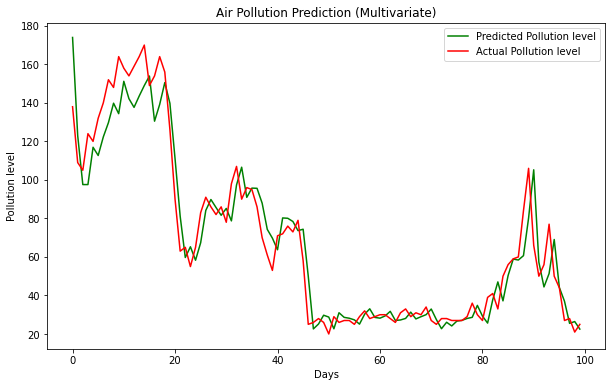

<Figure size 432x288 with 0 Axes>

In [27]:
#Plot the graph between actual vs predicted values
plt.figure(figsize=(10,6))  
plt.plot(Y_predicted[:100,:], color= 'green',label = 'Predicted Pollution level')
plt.plot(Y_tested[:100,:] , color = 'red',label = 'Actual Pollution level')
plt.title("Air Pollution Prediction (Multivariate)")
plt.xlabel("Days")
plt.ylabel("Pollution level")
plt.legend()
plt.show()
plt.savefig('graph.png')

In [25]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(Y_tested, Y_predicted)
print('MAPE', mape)


MAPE inf


C:\Users\ashis\AppData\Local\Temp\ipykernel_16400\249640264.py:3: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [26]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_tested, Y_predicted)
#print('Mean squared error', mse)
print('RMSE' , np.sqrt(mse))
print("Mean of Test data ", np.mean(Y_tested))

RMSE 31.056421
Mean of Test data  96.041435
